<ipython-input-10-b39f6bb770f2>:10: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Initial Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112260 entries, 0 to 112259
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  112260 non-null  object 
 1   Soil_Type               112260 non-null  object 
 2   Crop                    112260 non-null  object 
 3   Rainfall_mm             112260 non-null  float64
 4   Temperature_Celsius     112260 non-null  float64
 5   Fertilizer_Used         112259 non-null  object 
 6   Irrigation_Used         112259 non-null  object 
 7   Weather_Condition       112259 non-null  object 
 8   Days_to_Harvest         112259 non-null  float64
 9   Yield_tons_per_hectare  112259 non-null  float64
dtypes: float64(4), object(6)
memory usage: 8.6+ MB
None


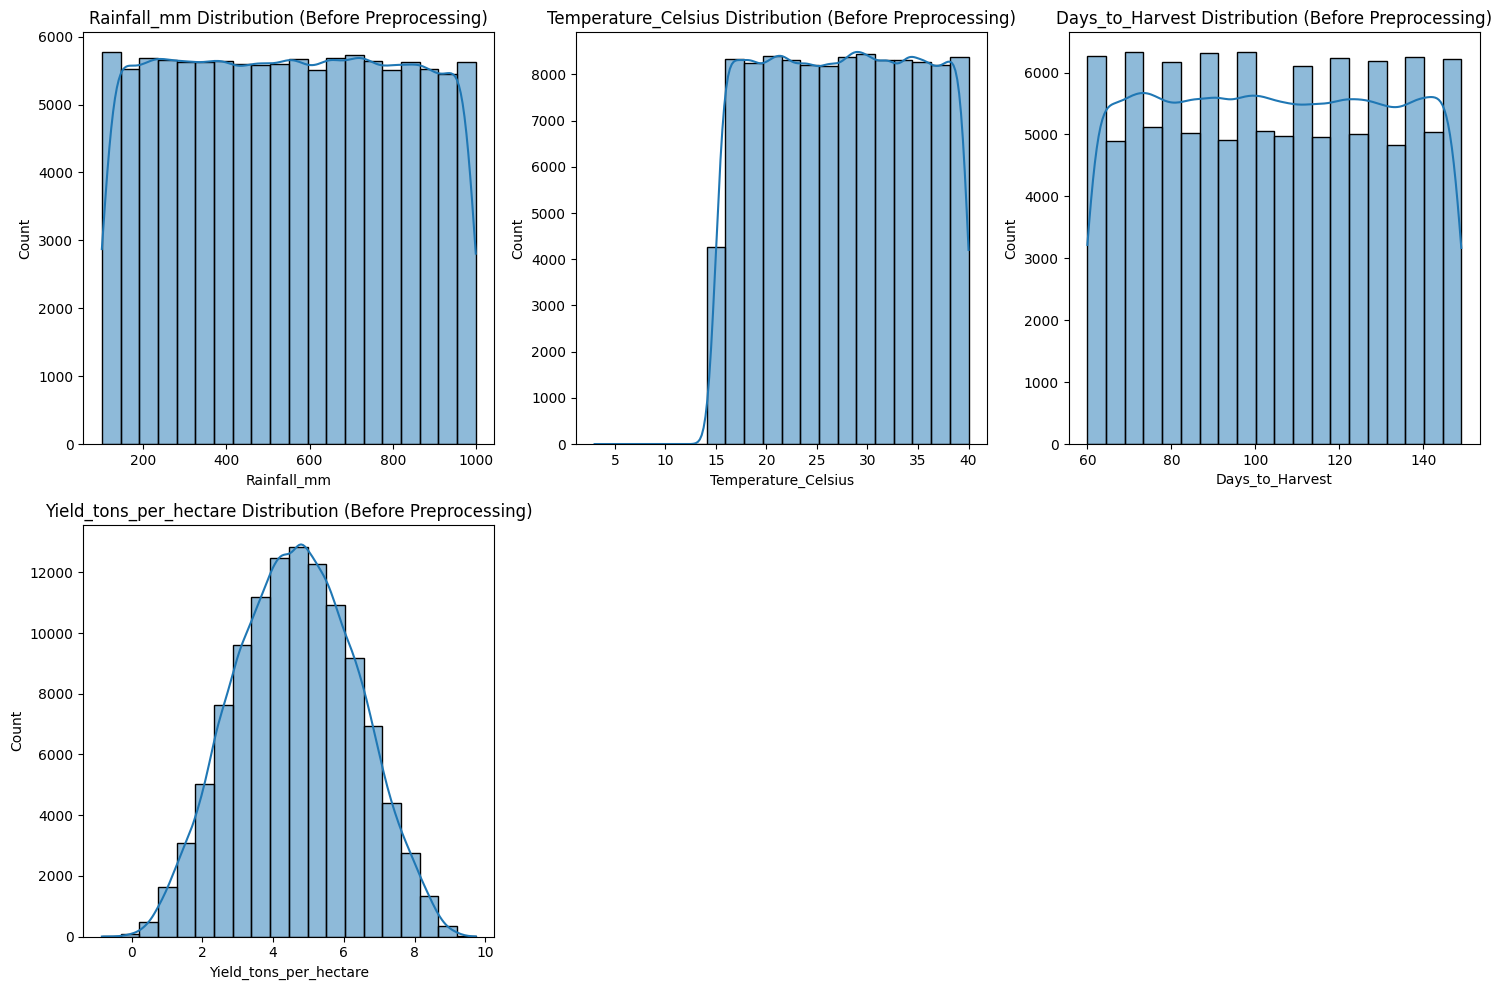

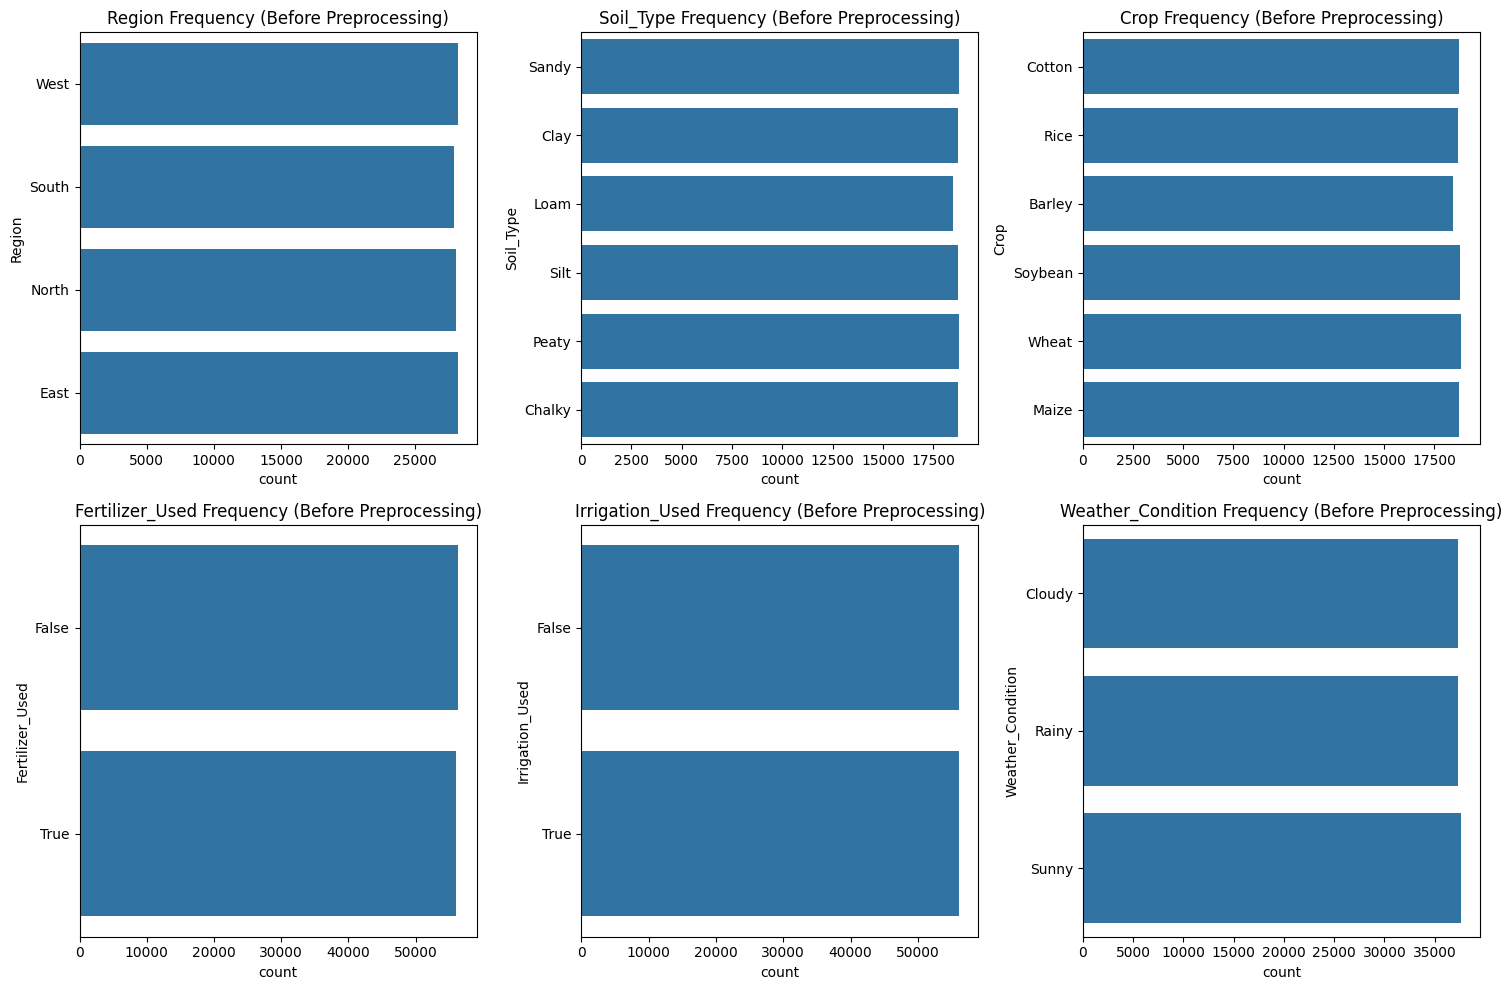

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = r"D:\Users\pc\OneDrive\Documents\4cp\S1\ML\mini_projet\crop_yield.csv"
data = pd.read_csv(file_path)

# Display the first few rows for inspection
print("Initial Data:")
print(data.info())

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Plot numeric columns
num_numeric_cols = len(numeric_cols)
rows_numeric = math.ceil(num_numeric_cols / 3)

fig, axes = plt.subplots(rows_numeric, 3, figsize=(15, rows_numeric * 5))
axes = axes.flatten()  # Flatten to easily iterate over axes
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution (Before Preprocessing)')
# Hide unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Plot categorical columns
num_categorical_cols = len(categorical_cols)
rows_categorical = math.ceil(num_categorical_cols / 3)

fig, axes = plt.subplots(rows_categorical, 3, figsize=(15, rows_categorical * 5))
axes = axes.flatten()  # Flatten to easily iterate over axes
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(f'{col} Frequency (Before Preprocessing)')
# Hide unused subplots
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()



# Save the preprocessed dataset



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


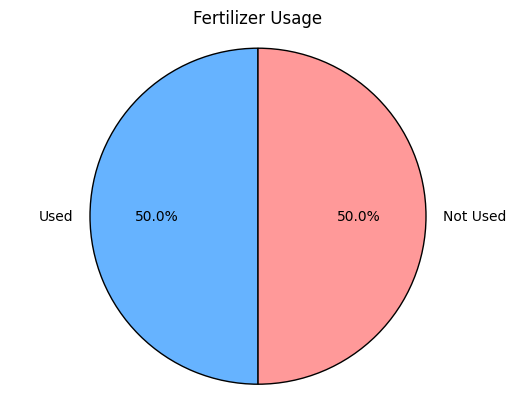

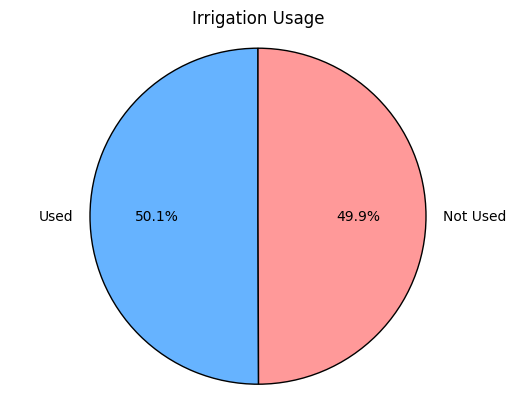

In [ ]:
# Create a function to plot pie charts
def plot_pie(data, title):
    value_counts = data.value_counts()
    labels = ['Used', 'Not Used']
    sizes = value_counts.values
    colors = ['#66b3ff', '#ff9999']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot Fertilizer Used Pie Chart
plot_pie(data['Fertilizer_Used'], 'Fertilizer Usage')

# Plot Irrigation Used Pie Chart
plot_pie(data['Irrigation_Used'], 'Irrigation Usage')

In [ ]:

print(data['Yield_tons_per_hectare'].describe())



data['Rainfall_mm'] = pd.cut(data['Rainfall_mm'], bins=[0, 300, 600, 1000], labels=['Low', 'Medium', 'High'])
data['Temperature_Celsius'] = pd.cut(data['Temperature_Celsius'], bins=[0, 15, 25, 35], labels=['Low', 'Medium', 'High'])
data['Yield_tons_per_hectare'] = pd.cut(data['Yield_tons_per_hectare'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

encoded_data = pd.get_dummies(data, columns=['Region', 'Soil_Type', 'Crop', 'Rainfall_mm',
                                             'Temperature_Celsius', 'Weather_Condition',
                                             'Fertilizer_Used', 'Irrigation_Used', 'Yield_tons_per_hectare'])

transaction_data = encoded_data.drop(columns=['Days_to_Harvest'])

print(transaction_data.columns)

print(transaction_data.head(6))

transaction_data=transaction_data.dropna()
print(transaction_data.info())

print(transaction_data.shape)
transaction_data = transaction_data.sample(n=100000, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    112259.000000
mean          4.643501
std           1.696499
min          -0.841617
25%           3.413154
50%           4.649180
75%           5.867159
max           9.727004
Name: Yield_tons_per_hectare, dtype: float64
Index(['Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Soil_Type_Chalky', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Barley',
       'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat',
       'Rainfall_mm_Low', 'Rainfall_mm_Medium', 'Rainfall_mm_High',
       'Temperature_Celsius_Low', 'Temperature_Celsius_Medium',
       'Temperature_Celsius_High', 'Weather_Condition_Cloudy',
       'Weather_Condition_Rainy', 'Weather_Condition_Sunny',
       'Fertilizer_Used_False', 'Fertilizer_Used_True',
       'Irrigation_Used_False', 'Irrigation_Used_True',
       'Yield_tons_per_hectare_Low', 'Yield_tons_per_hectare_Medium',
       'Yield_tons_per_hectare_High'],
     

In [ ]:
#best model
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6 , num_itemsets=len(frequent_itemsets))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Top 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
print("Shape of the rules DataFrame:", rules.shape)

Top 10 Association Rules:
          antecedents                      consequents  support  confidence  \
0       (Region_East)  (Yield_tons_per_hectare_Medium)  0.18271    0.731015   
1      (Region_North)  (Yield_tons_per_hectare_Medium)  0.18125    0.727211   
2      (Region_South)  (Yield_tons_per_hectare_Medium)  0.18263    0.733042   
3       (Region_West)  (Yield_tons_per_hectare_Medium)  0.18497    0.734941   
4  (Soil_Type_Chalky)  (Yield_tons_per_hectare_Medium)  0.12245    0.732576   
5    (Soil_Type_Clay)  (Yield_tons_per_hectare_Medium)  0.12208    0.733566   
6    (Soil_Type_Loam)  (Yield_tons_per_hectare_Medium)  0.11929    0.725079   
7   (Soil_Type_Peaty)  (Yield_tons_per_hectare_Medium)  0.12213    0.731449   
8   (Soil_Type_Sandy)  (Yield_tons_per_hectare_Medium)  0.12251    0.732234   
9    (Soil_Type_Silt)  (Yield_tons_per_hectare_Medium)  0.12310    0.734355   

       lift  
0  0.999256  
1  0.994055  
2  1.002025  
3  1.004622  
4  1.001388  
5  1.002742  
6  0.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.to_csv("association_rules_with_cof0.6.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


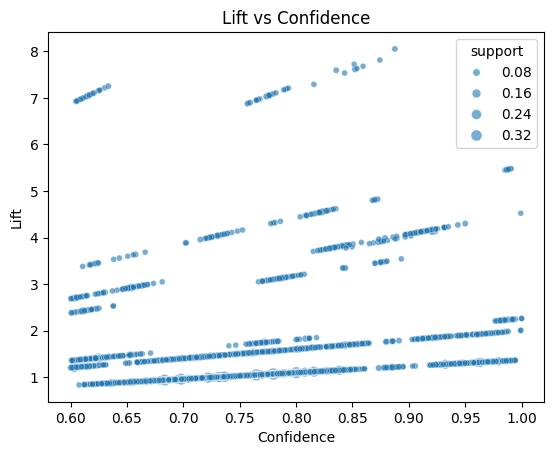

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=rules['confidence'], y=rules['lift'], size=rules['support'], alpha=0.6)
plt.title('Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


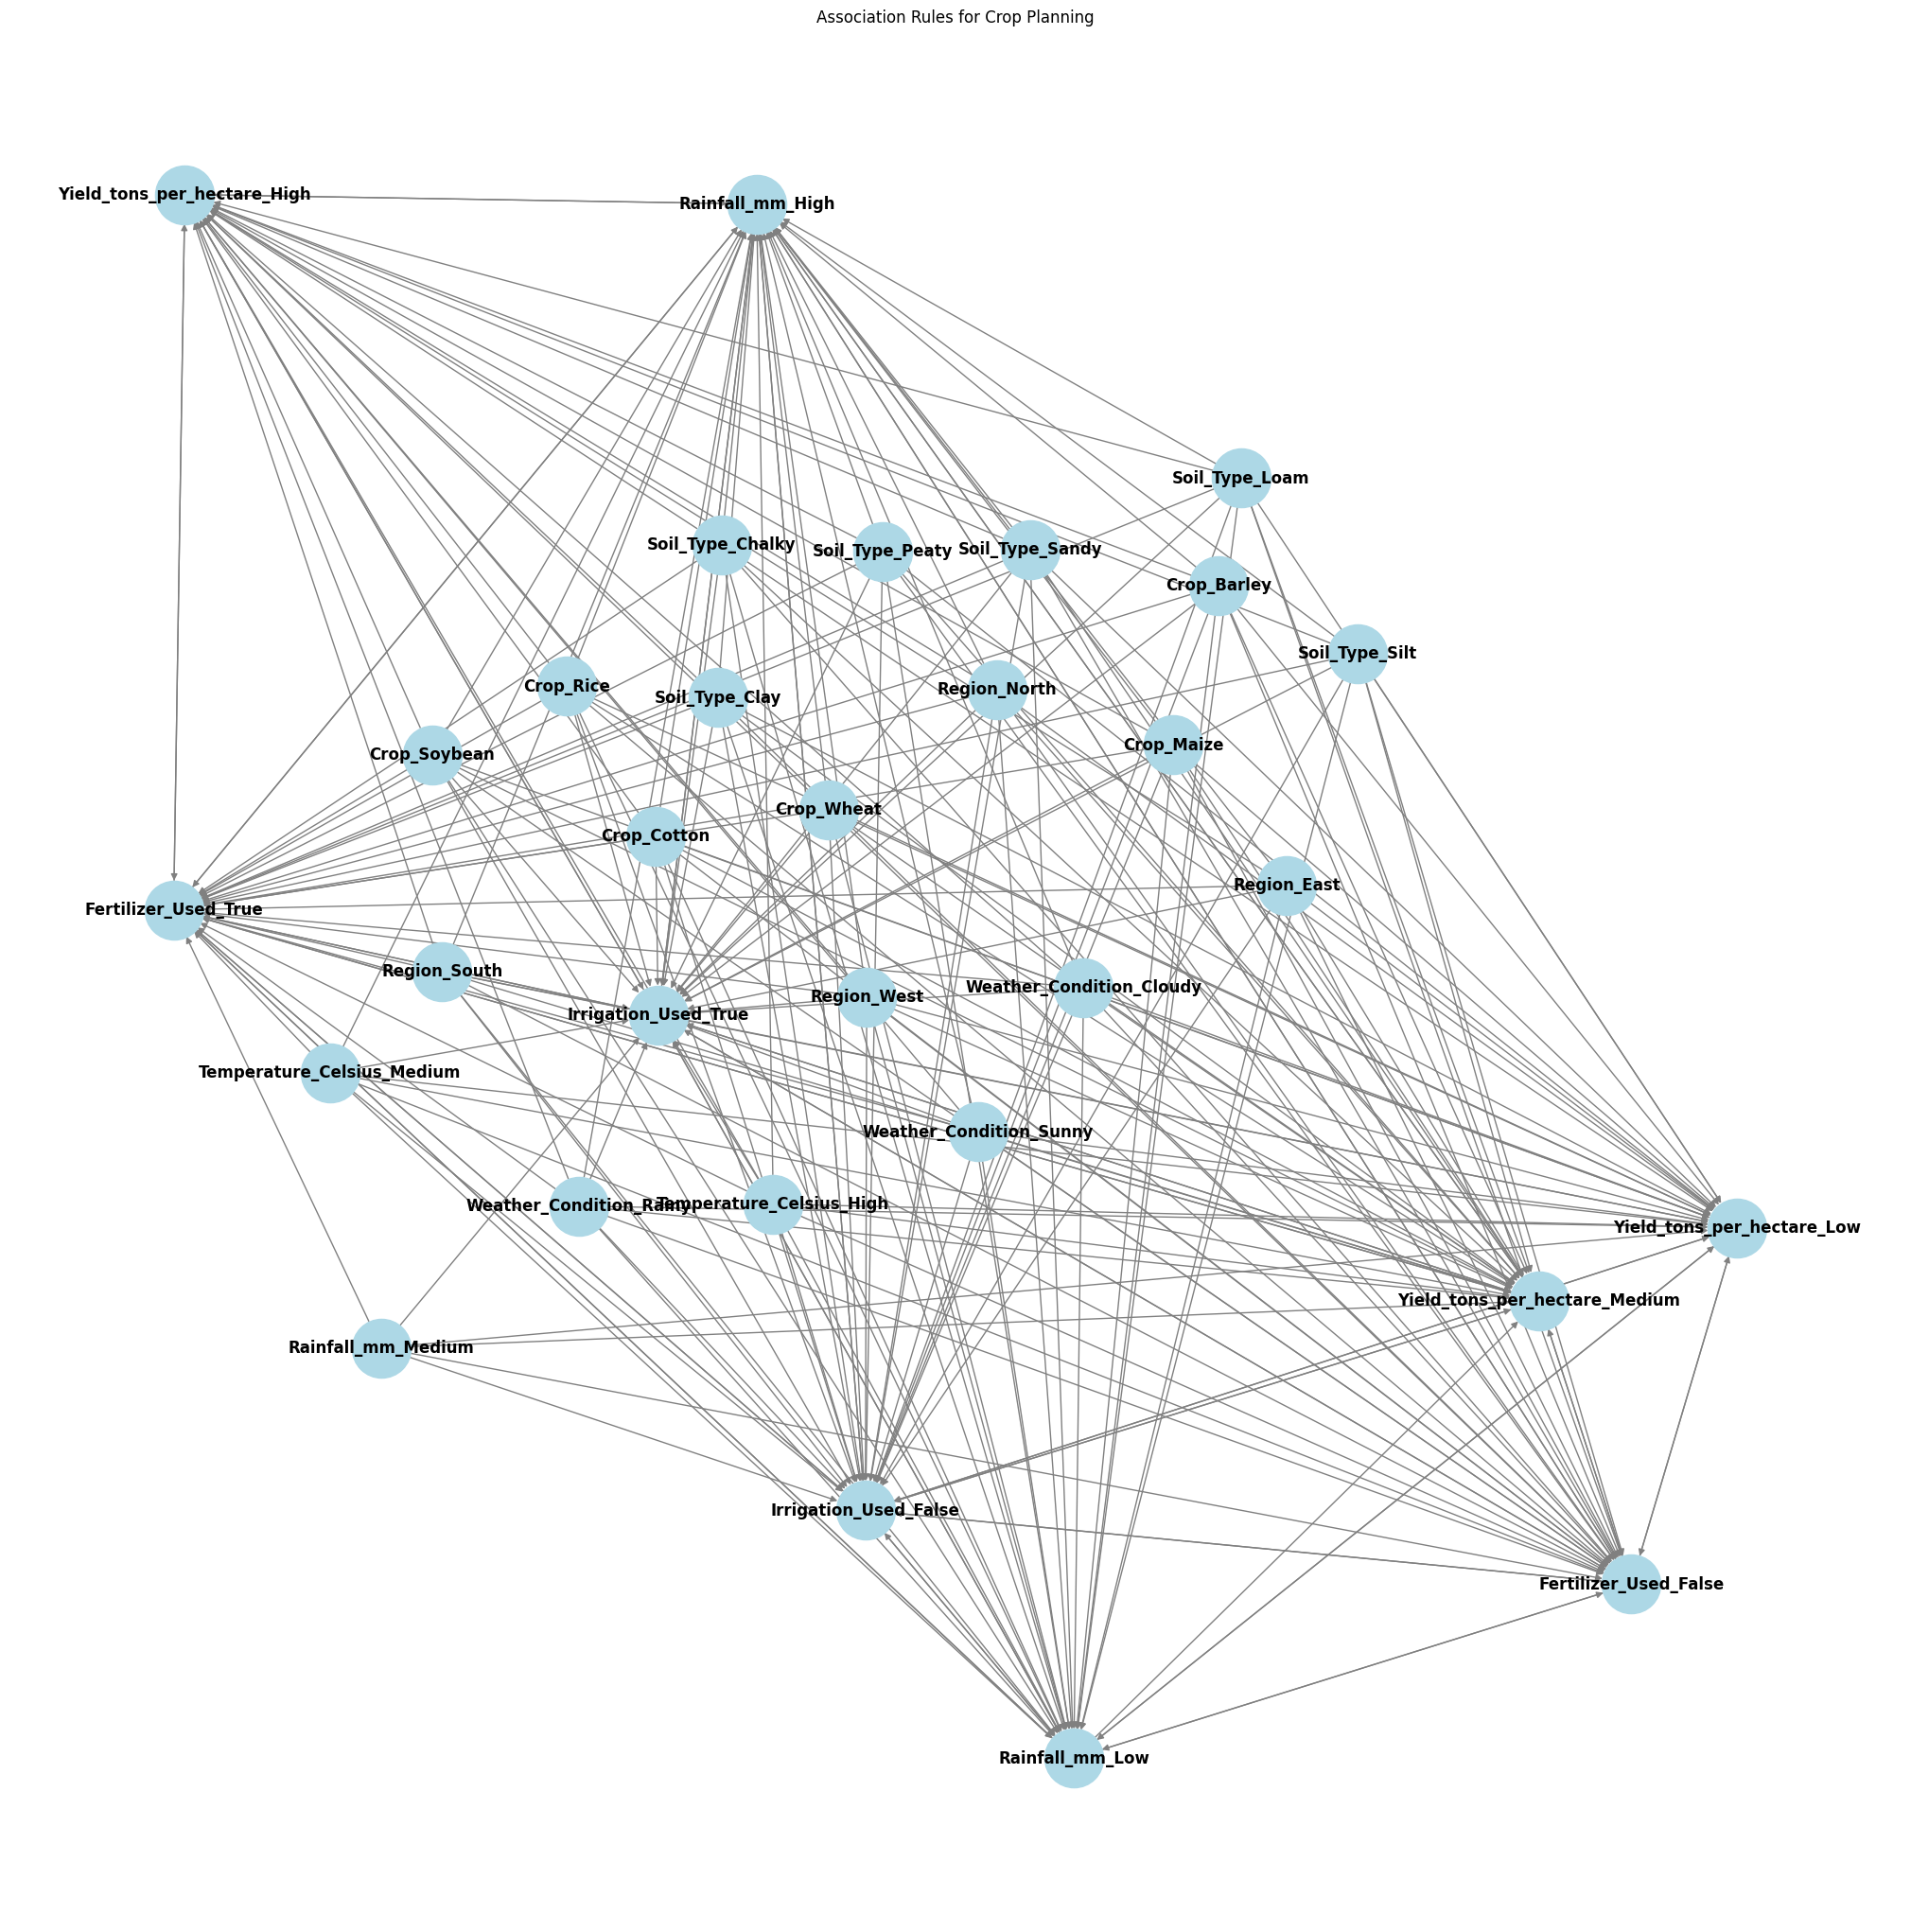

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph from the association rules
G = nx.DiGraph()

for index, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Plot the graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', edge_color='gray', node_size=2000)
plt.title('Association Rules for Crop Planning')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-3ede3f945565>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rules['lift'].round(4), y=top_rules.index, palette='viridis')


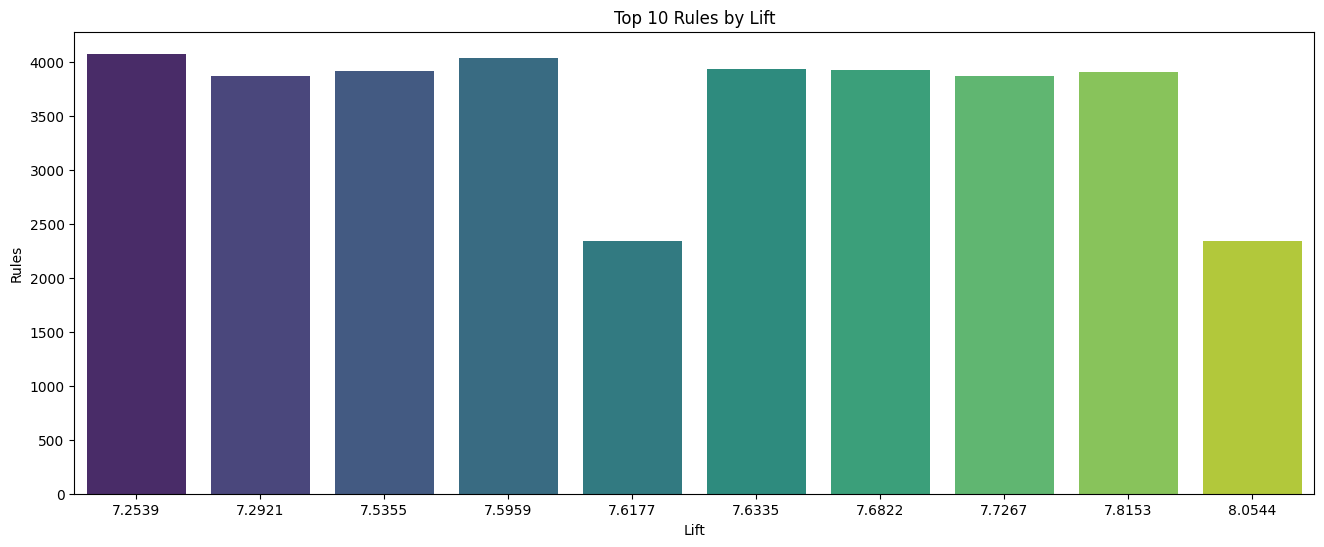

In [ ]:
# Bar plot of top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(16, 6))
sns.barplot(x=top_rules['lift'].round(4), y=top_rules.index, palette='viridis')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


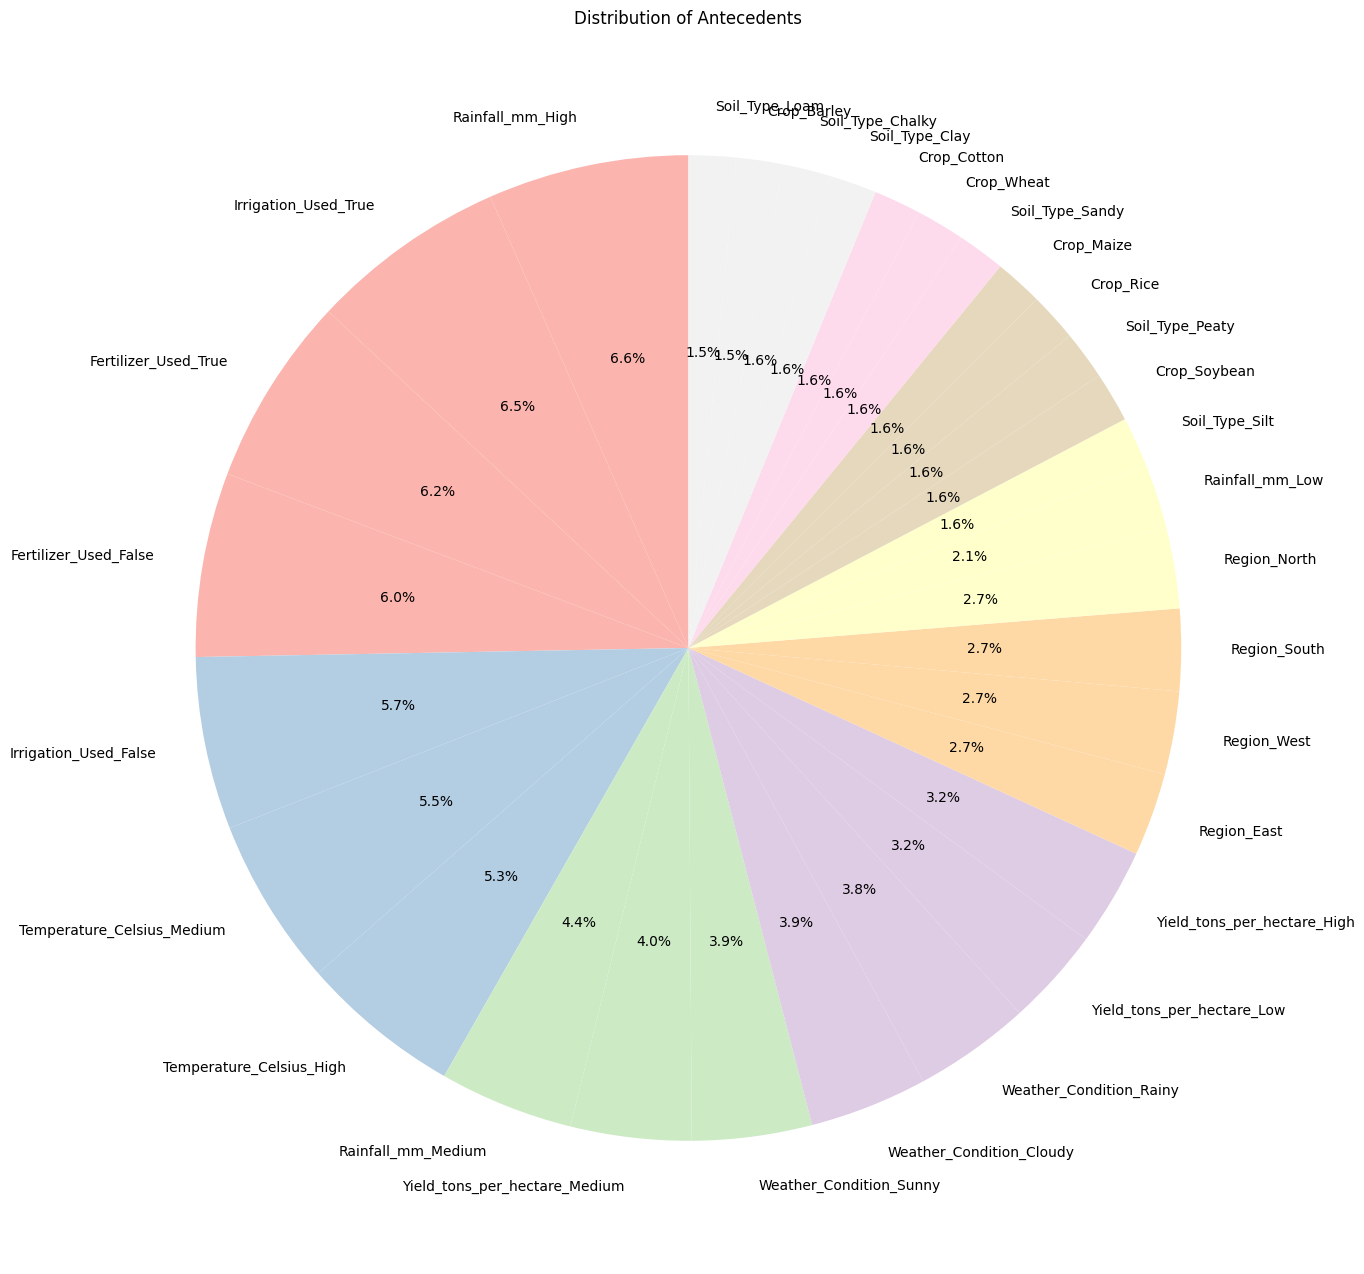

In [ ]:
# Pie chart of antecedents frequency
antecedents_flat = [item for sublist in rules['antecedents'] for item in sublist]
antecedents_counts = pd.Series(antecedents_flat).value_counts()

plt.figure(figsize=(16, 16))
antecedents_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Distribution of Antecedents')
plt.ylabel('')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


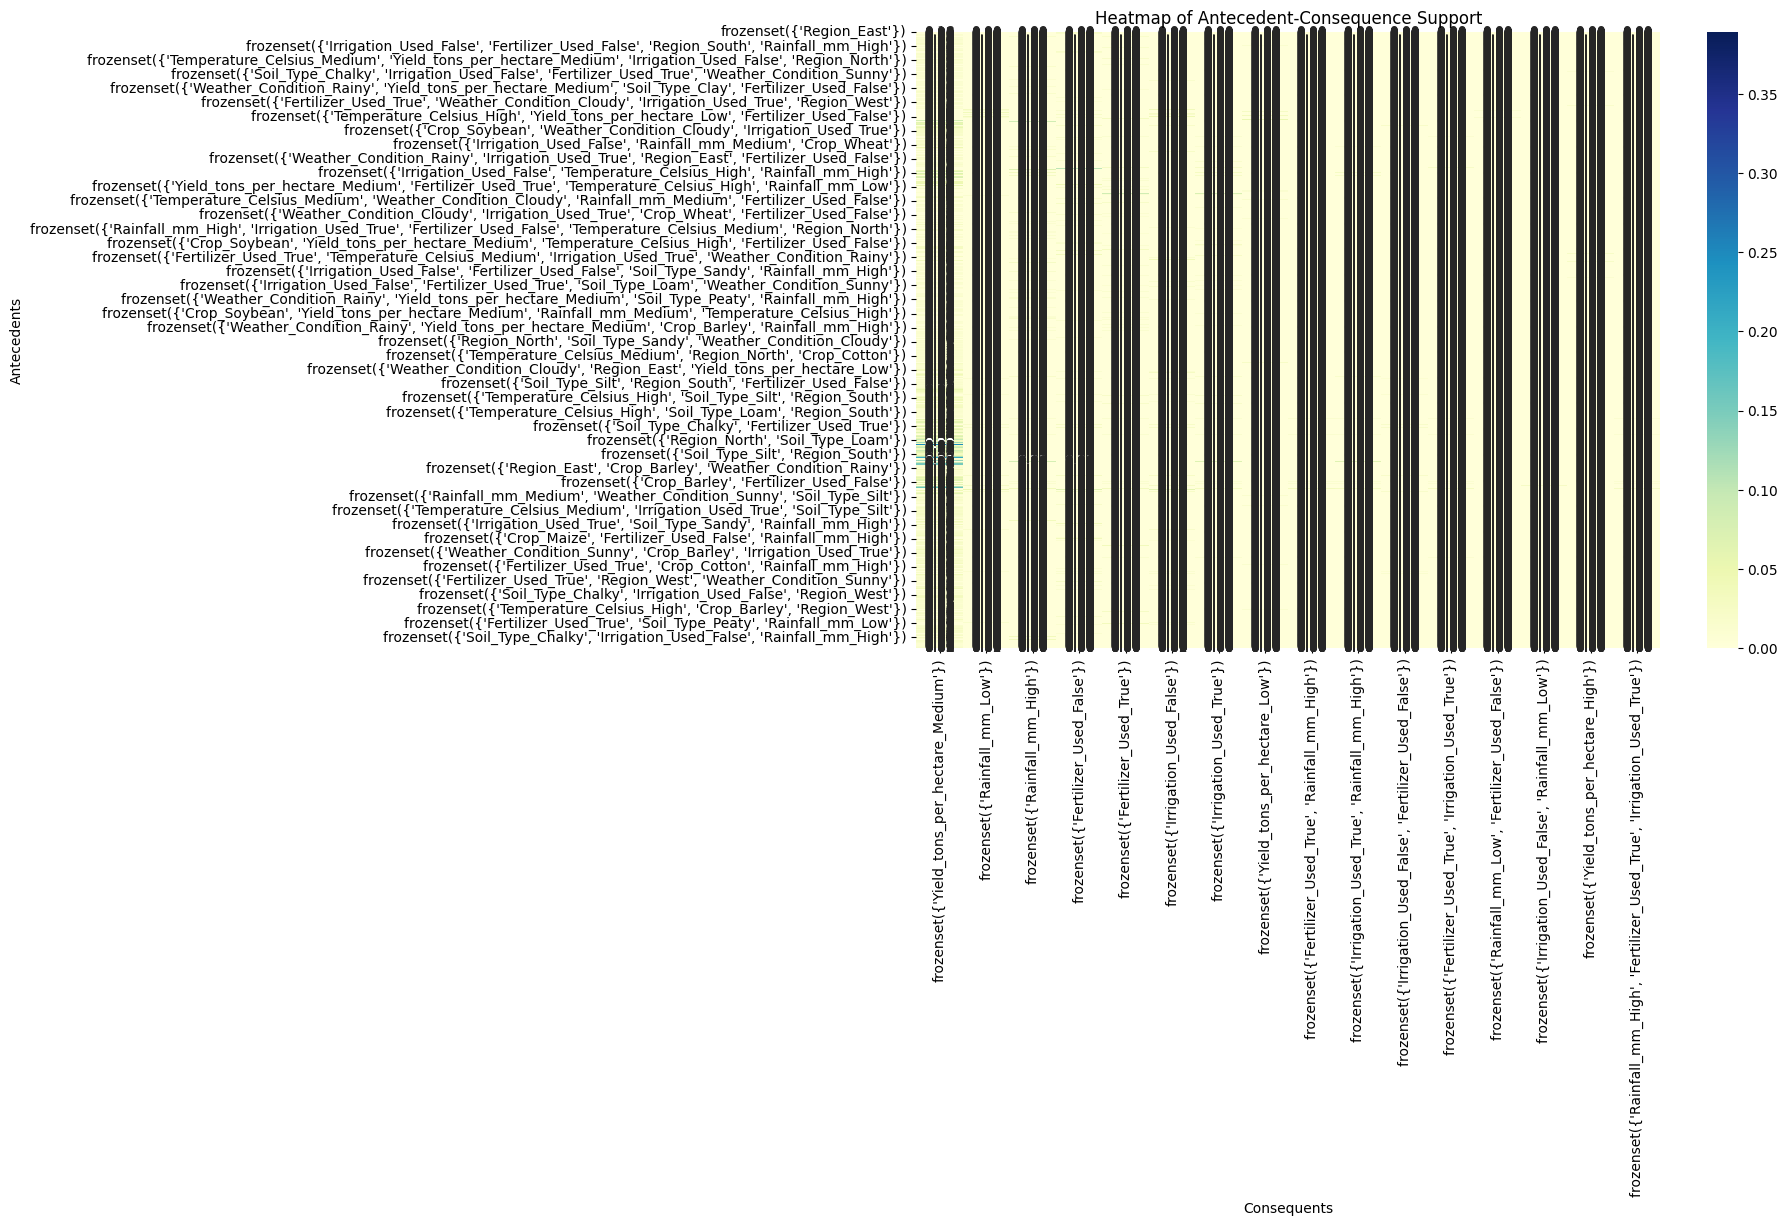

In [ ]:
# Create a pivot table of antecedents vs consequents with support as values
import pandas as pd
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='support', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Antecedent-Consequence Support')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets (min_support=0.1)
frequent_itemsets_basic = apriori(transaction_data, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets (min_confidence=0.7)
rules_basic = association_rules(frequent_itemsets_basic, metric="confidence", min_threshold=0.7, num_itemsets=len(frequent_itemsets_basic))

# Display the generated rules
print("Basic Apriori Model:")
print(rules_basic[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("Shape of the rules DataFrame:", rules_basic.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basic Apriori Model:
          antecedents                      consequents  support  confidence  \
0       (Region_East)  (Yield_tons_per_hectare_Medium)  0.18271    0.731015   
1      (Region_North)  (Yield_tons_per_hectare_Medium)  0.18125    0.727211   
2      (Region_South)  (Yield_tons_per_hectare_Medium)  0.18263    0.733042   
3       (Region_West)  (Yield_tons_per_hectare_Medium)  0.18497    0.734941   
4  (Soil_Type_Chalky)  (Yield_tons_per_hectare_Medium)  0.12245    0.732576   
5    (Soil_Type_Clay)  (Yield_tons_per_hectare_Medium)  0.12208    0.733566   
6    (Soil_Type_Loam)  (Yield_tons_per_hectare_Medium)  0.11929    0.725079   
7   (Soil_Type_Peaty)  (Yield_tons_per_hectare_Medium)  0.12213    0.731449   
8   (Soil_Type_Sandy)  (Yield_tons_per_hectare_Medium)  0.12251    0.732234   
9    (Soil_Type_Silt)  (Yield_tons_per_hectare_Medium)  0.12310    0.734355   

       lift  
0  0.999256  
1  0.994055  
2  1.002025  
3  1.004622  
4  1.001388  
5  1.002742  
6  0.991141

In [ ]:
rules_basic.to_csv("association_rules_basic.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets (min_support=0.05)
frequent_itemsets_low_support = apriori(transaction_data, min_support=0.05, use_colnames=True)

# Generate association rules from the frequent itemsets (min_confidence=0.7)
rules_low_support = association_rules(frequent_itemsets_low_support, metric="confidence", min_threshold=0.7, num_itemsets=len(frequent_itemsets_low_support))

# Display the generated rules
print("Apriori with Lower Support (min_support=0.05):")
print(rules_low_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("Shape of the rules DataFrame:", rules_low_support.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apriori with Lower Support (min_support=0.05):
          antecedents                      consequents  support  confidence  \
0       (Region_East)  (Yield_tons_per_hectare_Medium)  0.18271    0.731015   
1      (Region_North)  (Yield_tons_per_hectare_Medium)  0.18125    0.727211   
2      (Region_South)  (Yield_tons_per_hectare_Medium)  0.18263    0.733042   
3       (Region_West)  (Yield_tons_per_hectare_Medium)  0.18497    0.734941   
4  (Soil_Type_Chalky)  (Yield_tons_per_hectare_Medium)  0.12245    0.732576   
5    (Soil_Type_Clay)  (Yield_tons_per_hectare_Medium)  0.12208    0.733566   
6    (Soil_Type_Loam)  (Yield_tons_per_hectare_Medium)  0.11929    0.725079   
7   (Soil_Type_Peaty)  (Yield_tons_per_hectare_Medium)  0.12213    0.731449   
8   (Soil_Type_Sandy)  (Yield_tons_per_hectare_Medium)  0.12251    0.732234   
9    (Soil_Type_Silt)  (Yield_tons_per_hectare_Medium)  0.12310    0.734355   

       lift  
0  0.999256  
1  0.994055  
2  1.002025  
3  1.004622  
4  1.001388  

In [ ]:
rules_low_support.to_csv("association_rules_low_support.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets (min_support=0.1)
frequent_itemsets_high_confidence = apriori(transaction_data, min_support=0.1, use_colnames=True)

# Generate association rules with a higher confidence (min_confidence=0.8)
rules_high_confidence = association_rules(frequent_itemsets_high_confidence, metric="confidence", min_threshold=0.8, num_itemsets=len(frequent_itemsets_high_confidence))

# Display the generated rules
print("Apriori with Higher Confidence (min_confidence=0.8):")
print(rules_high_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("Shape of the rules DataFrame:", rules_high_confidence.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apriori with Higher Confidence (min_confidence=0.8):
                                      antecedents  \
0                            (Rainfall_mm_Medium)   
1                              (Rainfall_mm_High)   
2                    (Yield_tons_per_hectare_Low)   
3  (Rainfall_mm_Medium, Temperature_Celsius_High)   
4      (Rainfall_mm_Medium, Fertilizer_Used_True)   
5      (Rainfall_mm_Medium, Irrigation_Used_True)   
6  (Temperature_Celsius_Medium, Rainfall_mm_High)   
7     (Rainfall_mm_High, Weather_Condition_Rainy)   
8     (Weather_Condition_Sunny, Rainfall_mm_High)   
9       (Fertilizer_Used_False, Rainfall_mm_High)   

                       consequents  support  confidence      lift  
0  (Yield_tons_per_hectare_Medium)  0.27211    0.815751  1.115084  
1  (Yield_tons_per_hectare_Medium)  0.35434    0.800154  1.093763  
2          (Fertilizer_Used_False)  0.15253    0.843546  1.683792  
3  (Yield_tons_per_hectare_Medium)  0.11107    0.826660  1.129996  
4  (Yield_tons_per_hect

In [ ]:
rules_high_confidence.to_csv("association_rules_hig_confi.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets (min_support=0.1)
frequent_itemsets_high_lift = apriori(transaction_data, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets and filter by lift (min_lift=1.5)
rules_high_lift = association_rules(frequent_itemsets_high_lift, metric="lift", min_threshold=1.5, num_itemsets=len(frequent_itemsets_high_lift))

# Display the generated rules
print("Apriori with Higher Lift (min_lift=1.5):")
print(rules_high_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("Shape of the rules DataFrame:", rules_high_lift.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apriori with Higher Lift (min_lift=1.5):
                                         antecedents  \
0                       (Yield_tons_per_hectare_Low)   
1                                  (Rainfall_mm_Low)   
2                       (Yield_tons_per_hectare_Low)   
3                            (Fertilizer_Used_False)   
4                            (Irrigation_Used_False)   
5                       (Yield_tons_per_hectare_Low)   
6  (Irrigation_Used_False, Yield_tons_per_hectare...   
7     (Irrigation_Used_False, Fertilizer_Used_False)   
8                       (Yield_tons_per_hectare_Low)   
9                            (Fertilizer_Used_False)   

                                         consequents  support  confidence  \
0                                  (Rainfall_mm_Low)  0.11819    0.653633   
1                       (Yield_tons_per_hectare_Low)  0.11819    0.528601   
2                            (Fertilizer_Used_False)  0.15253    0.843546   
3                       (Yield_ton

In [ ]:
rules_high_lift.to_csv("association_rules_high_lift.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets (min_support=0.05)
frequent_itemsets_low_support_high_confidence = apriori(transaction_data, min_support=0.05, use_colnames=True)

# Generate association rules with high confidence (min_confidence=0.9)
rules_low_support_high_confidence = association_rules(frequent_itemsets_low_support_high_confidence,
                                                     metric="confidence", min_threshold=0.9, num_itemsets=len(frequent_itemsets_low_support_high_confidence))

# Display the generated rules
print("Apriori with Low Support and High Confidence (min_support=0.05, min_confidence=0.9):")
print(rules_low_support_high_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("Shape of the rules DataFrame:", rules_low_support_high_confidence.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apriori with Low Support and High Confidence (min_support=0.05, min_confidence=0.9):
                                         antecedents  \
0                      (Yield_tons_per_hectare_High)   
1                      (Yield_tons_per_hectare_High)   
2   (Rainfall_mm_Medium, Yield_tons_per_hectare_Low)   
3         (Rainfall_mm_Medium, Fertilizer_Used_True)   
4   (Rainfall_mm_Medium, Yield_tons_per_hectare_Low)   
5         (Rainfall_mm_Medium, Irrigation_Used_True)   
6          (Fertilizer_Used_False, Rainfall_mm_High)   
7  (Fertilizer_Used_True, Yield_tons_per_hectare_...   
8    (Yield_tons_per_hectare_High, Rainfall_mm_High)   
9                      (Yield_tons_per_hectare_High)   

                                consequents  support  confidence      lift  
0                        (Rainfall_mm_High)  0.08618    0.986945  2.228671  
1                    (Fertilizer_Used_True)  0.08155    0.933921  1.871548  
2                   (Fertilizer_Used_False)  0.05815    0.964025  1

In [ ]:
rules_low_support_high_confidence.to_csv("association_rules_lows_supprt_high_confidence.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
